In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/content'

In [3]:
!ls

Air_Quality.csv  sample_data


In [4]:
aq_df = pd.read_csv("Air_Quality.csv")

In [5]:
aq_df.head(500)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,131015,652,O3-Attributable Cardiac and Respiratory Deaths,Estimated Annual Rate,"per 100,000 residents",UHF42,409,Southeast Queens,2005-2007,01/01/2005,4.30,NaN
496,131016,652,O3-Attributable Cardiac and Respiratory Deaths,Estimated Annual Rate,"per 100,000 residents",UHF42,410,Rockaways,2005-2007,01/01/2005,11.70,NaN
497,131017,652,O3-Attributable Cardiac and Respiratory Deaths,Estimated Annual Rate,"per 100,000 residents",UHF42,501,Port Richmond,2005-2007,01/01/2005,5.60,NaN
498,131018,652,O3-Attributable Cardiac and Respiratory Deaths,Estimated Annual Rate,"per 100,000 residents",UHF42,502,Stapleton - St. George,2005-2007,01/01/2005,8.70,NaN


 DATA PREPROCESSING PLAN:
 **Personal note: Do all of this in numpy, then in pandas too.**
 **I did a ton of work in pursuit of working on comorbidities but as I got into it, I realized that it will never work. My new proposed question, which I hope will work, is:

 **Does Traffic Density Affect Emissions or are other factors heavier contributors to air polluion?**

I did some preliminary preprocessing to make sure that the data was consistent:
- check for repeats in unique id
- make sure that the indicator ID and names are consistent.
- make sure that all the measures and measure info columns are consistent. For example, i don't want one ozone entry to be median ppb when the others are mean ppm. That way I can see if anything needs to be converted for when we compare.
- check the data values and make sure they align with the measure type and make necessary conversions.
- figure out what geo type name and join id mean.


Unique IDs checking

In [6]:
import numpy as np
np_aqdf = np.array(aq_df)
np.set_printoptions(threshold = np.inf) #lets me see all values
uid = []
for i in np_aqdf: #for each object(row) in matrix, add the value from the first idex to a list.
  uid.append(i[0])
if len(set(uid)) == len(np_aqdf):  #sets cut out duplicates.
  print("there are no duplicate unique ids")
else:
  print("you need to find the duplicate unique ids")

there are no duplicate unique ids


Indicator ID and Name match check. Also sorting by contaminant.

In [7]:
#figure out how many indicator ids there are and their pairs
variables = dict(np_aqdf[:,[1,2]]) #this is awesome. I'm worried, since you cant have duplicate keys, that there
#may be a 386 with ozone and a 386 with boiler emissions.... that would be deleted??? but i guess these are all
#the possible indicator ids, so i could do a search on the main df like if 386 doesn't = 'ozone(o3)' to lmk?
print("The", len(variables), "variables and their respective IDs for the entire dataset:", variables)
ozone_dataset = []
sulfurdioxide_dataset = []
pm25_dataset = []
nox_dataset =[]
benzene_dataset = []
formaldehyde_dataset = []
trafficdensity_dataset = []
for i in np_aqdf:
  if i[1] == 386 or i[1] == 652 or i[1] == 653 or i[1] == 655 or i[1] == 659 or i[1] == 661:
    ozone_dataset.append(i)
  elif i[1] == 383 or i[1] == 640:
    sulfurdioxide_dataset.append(i)
  elif i[1] == 639 or i[1] == 641 or i[1] == 648 or i[1] == 650 or i[1] == 651 or i[1] == 657 or i[1] == 365:
    pm25_dataset.append(i)
  elif i[1] == 642 or i[1] == 375: # are these the same or different?
    nox_dataset.append(i)
  elif i[1] == 646:
    benzene_dataset.append(i)
  elif i[1] == 647:
    formaldehyde_dataset.append(i)
  elif i[1] == 643 or i[1] == 644 or i[1] == 645:
    trafficdensity_dataset.append(i)
datasets = {'ozone' : ozone_dataset, 'sulfur dioxide': sulfurdioxide_dataset, 'particulate matter': pm25_dataset, 'nitrogen dioxide' : nox_dataset, 'benzene' : benzene_dataset, 'formaldehyde': formaldehyde_dataset, 'traffic density' : trafficdensity_dataset}
for k, v in datasets.items():
  l = len(v)
  print(l, "data points for", k)

#these lengths match up with the length of np_aqdf so we have no mismatched values :)



The 22 variables and their respective IDs for the entire dataset: {386: 'Ozone (O3)', 383: 'Sulfur Dioxide (SO2)', 639: 'PM2.5-Attributable Deaths', 640: 'Boiler Emissions- Total SO2 Emissions', 641: 'Boiler Emissions- Total PM2.5 Emissions', 642: 'Boiler Emissions- Total NOx Emissions', 646: 'Air Toxics Concentrations- Average Benzene Concentrations', 647: 'Air Toxics Concentrations- Average Formaldehyde Concentrations', 648: 'PM2.5-Attributable Asthma Emergency Department Visits', 650: 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)', 651: 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)', 643: 'Traffic Density- Annual Vehicle Miles Traveled', 652: 'O3-Attributable Cardiac and Respiratory Deaths', 653: 'O3-Attributable Asthma Emergency Department Visits', 655: 'O3-Attributable Asthma Hospitalizations', 657: 'PM2.5-Attributable Asthma Emergency Department Visits', 659: 'O3-Attributable Asthma Emergency Department Visits', 661: 'O

**Ozone category splitting and checking for measurement and unit consistency:**

In [8]:
ozone_ds = np.array(ozone_dataset)
ozone_ds.shape
ozone_ds.dtype
grouping_ozone = dict(ozone_ds[:,[2,3]])
print("All categories for ozone:", grouping_ozone)
o3free = []
o3crdeaths = []
o3asthemerg = []
o3asthhosp = []
for i in ozone_ds:
  if i[2] == 'Ozone (O3)':
    o3free.append(i)
  elif i[2] == 'O3-Attributable Cardiac and Respiratory Deaths':
    o3crdeaths.append(i)
  elif i[2] == 'O3-Attributable Asthma Emergency Department Visits':
    o3asthemerg.append(i)
  elif i[2] == 'O3-Attributable Asthma Hospitalizations':
    o3asthhosp.append(i)
ozone_big_groups = {'Ozone (O3)' : o3free, 'O3-Attributable Cardiac and Respiratory Deaths' : o3crdeaths, 'O3 Attributable Asthma Emergency Department Visits' : o3asthemerg, 'O3-Attributable Asthma Hospitalizations': o3asthhosp}
for k, v in ozone_big_groups.items():
  length = len(v)
  print(length, "data points for", k)
#these numbers add up properly :)
for i in o3free:
  if i[3] != 'Mean':
    print(i)
  elif i[4] != 'ppb':
    print(i)
# all measurement types and units are the same
for i in o3crdeaths:
  if i[3] != 'Estimated Annual Rate':
    print(i)
  elif i[4] != 'per 100,000 residents':
    print(i)
#all measurement types and units are the same
o3ae_np = np.array(o3asthemerg)
subs = dict(o3ae_np[:,[3,4]])
#there are two types of i[3] but they are the same measurement type and unit, just adults vs kids. split it?
o3ae_adults = []
o3ae_children = []
for i in o3ae_np:
  if i[3] == 'Estimated Annual Rate- Children 0 to 17 Yrs Old':
    o3ae_children.append(i)
  else:
    o3ae_adults.append(i)
#all good
o3ah_np = np.array(o3asthhosp)
subs1 = dict(o3ah_np[:,[3,4]])
o3ah_adults = []
o3ah_children = []
for i in o3ah_np:
  if i[3] == 'Estimated Annual Rate- Children 0 to 17 Yrs Old':
    o3ah_children.append(i)
  else:
    o3ah_adults.append(i)
#all good


All categories for ozone: {'Ozone (O3)': 'Mean', 'O3-Attributable Cardiac and Respiratory Deaths': 'Estimated Annual Rate', 'O3-Attributable Asthma Emergency Department Visits': 'Estimated Annual Rate- 18 Yrs and Older', 'O3-Attributable Asthma Hospitalizations': 'Estimated Annual Rate- 18 Yrs and Older'}
1692 data points for Ozone (O3)
192 data points for O3-Attributable Cardiac and Respiratory Deaths
384 data points for O3 Attributable Asthma Emergency Department Visits
384 data points for O3-Attributable Asthma Hospitalizations


**Sulfur Dioxide category splitting and checking for measurement and unit consistency:**

In [9]:
sd_np = np.array(sulfurdioxide_dataset)
print(sd_np[1])
sd_cat = dict(sd_np[:,[2,3]]) #theres two diff categories so split them
sd_boileremiss = []
sd_emiss = []
for i in sd_np:
  if i[2] != 'Sulfur Dioxide (SO2)':
    sd_boileremiss.append(i)
sd_boiler = np.array(sd_boileremiss)
for i in sd_boiler:
  if i[2] != 'Boiler Emissions- Total SO2 Emissions':
    print(i)
#no typing erros so we're safe to split
for i in sd_np:
  if i[2] == 'Sulfur Dioxide (SO2)':
    sd_emiss.append(i)
sd_free = np.array(sd_emiss)
for i in sd_free:
  if i[3]  != 'Mean':
    print(i)
  if i[4] != 'ppb':
    print(i)
#all good
sd_boiler[1]
for i in sd_boiler:
  if i[3] != 'Number per km2':
    print(i)
  elif i[4] != 'number':
    print(i)
#all good

print("Two categories for Sulfur Dioxide:", len(sd_free), "data points for Sulfur Dioxide (SO2), and", len(sd_boiler), "data points for Boiler Emissions- Total SO2 Emissions.")
#these numbers add up

[164877 383 'Sulfur Dioxide (SO2)' 'Mean' 'ppb' 'CD' 212
 'Williamsbridge and Baychester (CD12)' 'Winter 2008-09' '12/01/2008' 5.75
 nan]
Two categories for Sulfur Dioxide: 1128 data points for Sulfur Dioxide (SO2), and 96 data points for Boiler Emissions- Total SO2 Emissions.


**Particulate Matter category splitting and checking for measurement and unit consistency:**

In [10]:
pm25_dataset[1]
pm_25 = np.array(pm25_dataset)
pm_25.shape
sub2 = dict(pm_25[:,[2,3]])
print("Categories for particulate matter:", sub2)
pm25_death = []
pm25_boiler = []
pm25_asthemerg = []
pm25_resphosp = []
pm25_cardhosp = []
pm25_free = []
baddata = []
for i in pm_25:
  if i[2] == 'PM2.5-Attributable Deaths':
    pm25_death.append(i)
  elif i[2] == 'Boiler Emissions- Total PM2.5 Emissions':
    pm25_boiler.append(i)
  elif i[2] == 'PM2.5-Attributable Asthma Emergency Department Visits':
    pm25_asthemerg.append(i)
  elif i[2] == 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)':
    pm25_resphosp.append(i)
  elif i[2] == 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)':
    pm25_cardhosp.append(i)
  elif i[2] == 'Fine Particulate Matter (PM2.5)':
    pm25_free.append(i)
  else:
    baddata.append(i)
categories_pm25 = {'PM2.5-Attributable Deaths': pm25_death, 'Boiler Emissions- Total PM2.5 Emissions': pm25_boiler, 'PM2.5-Attributable Asthma Emergency Department Visits': pm25_asthemerg, 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)': pm25_resphosp, 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)': pm25_cardhosp, 'Fine Particulate Matter (PM2.5)': pm25_free}
for k, v in categories_pm25.items():
  length = len(v)
  print(length, "data points for", k)
#these numbers add up :)
len(baddata)
pm25_death[1]
for i in pm25_death:
  if i[3] != 'Estimated Annual Rate - Adults 30 Yrs and Older':
    print(i)
  elif i[4] != 'per 100,000 adults':
    print(i)
#all good
pm25_boiler[1]
for i in pm25_boiler:
  if i[3] != 'Number per km2':
    print(i)
  elif i[4] != 'number':
    print(i)
#all good
pm25_ae_adults = []
pm25_ae_children = []
for i in pm25_asthemerg:
  if i[3] != 'Estimated Annual Rate- Children 0 to 17 Yrs Old':
    pm25_ae_adults.append(i)
for i in pm25_ae_adults:
  if i[3] != 'Estimated Annual Rate- 18 Yrs and Older':
    print(i)
#two categories
for i in pm25_asthemerg:
  if i[3] == 'Estimated Annual Rate- Children 0 to 17 Yrs Old':
    pm25_ae_children.append(i)
for i in pm25_ae_children:
  if i[4] != 'per 100,000 children':
    print(i)
#all good
for i in pm25_ae_adults:
  if i[4] != 'per 100,000 adults':
    print(i)
#all good
pm25_resphosp[1]
for i in pm25_resphosp:
  if i[2] != 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)':
    print(i)
  elif i[3] != 'Estimated Annual Rate':
    print(i)
  elif i[4] != 'per 100,000 adults':
    print(i)
#all good
pm25_cardhosp[1]
for i in pm25_cardhosp:
  if i[2] != 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)':
    print(i)
  elif i[3] != 'Estimated Annual Rate':
    print(i)
  elif i[4] != 'per 100,000 adults':
    print(i)
#all good
pm25_free[1]
for i in pm25_free:
  if i[3] != 'Mean':
    print(i)
  elif i[4] != 'mcg per cubic meter':
    print(i)
#all good

Categories for particulate matter: {'PM2.5-Attributable Deaths': 'Estimated Annual Rate - Adults 30 Yrs and Older', 'Boiler Emissions- Total PM2.5 Emissions': 'Number per km2', 'PM2.5-Attributable Asthma Emergency Department Visits': 'Estimated Annual Rate- 18 Yrs and Older', 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)': 'Estimated Annual Rate', 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)': 'Estimated Annual Rate', 'Fine Particulate Matter (PM2.5)': 'Mean'}
192 data points for PM2.5-Attributable Deaths
96 data points for Boiler Emissions- Total PM2.5 Emissions
384 data points for PM2.5-Attributable Asthma Emergency Department Visits
192 data points for PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)
192 data points for PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)
5076 data points for Fine Particulate Matter (PM2.5)


**NOx category splitting and checking for measurement and unit consistency:**
https://www.netl.doe.gov/research/Coal/energy-systems/gasification/gasifipedia/nitrogen-oxides


In [11]:
nox_dataset[1]
no2 = []
nox_boiler = []
for i in nox_dataset:
  if i[2] != 'Boiler Emissions- Total NOx Emissions':
    no2.append(i)
for i in no2:
  if i[2] != 'Nitrogen Dioxide (NO2)':
    print(i)
#two categories
for i in nox_dataset:
  if i[2] == 'Boiler Emissions- Total NOx Emissions':
    nox_boiler.append(i)
no2[1]
for i in no2:
  if i[3] != 'Mean':
    print(i)
  elif i[4] != 'ppb':
    print(i)
nox_boiler[1]
for i in nox_boiler:
  if i[3] != 'Number per km2':
    print(i)
  elif i[4] != 'number':
    print(i)
#all good

print("Two categories for NOx:", len(nox_boiler), "data points for Boiler Emissions- Total NOx Emissions, and", len(no2), "data points for Nitrogen Dioxide(NO2)")



Two categories for NOx: 96 data points for Boiler Emissions- Total NOx Emissions, and 5076 data points for Nitrogen Dioxide(NO2)


**Benzene category splitting and checking for measurement and unit consistency:**

In [12]:
print(benzene_dataset[1])
for i in benzene_dataset:
  if i[2] != 'Air Toxics Concentrations- Average Benzene Concentrations':
    print(i)
  elif i[3] != 'Annual Average Concentration':
    print(i)
  elif i[4] != 'µg/m3':
    print(i)
print(len(benzene_dataset), "data points for Benzene")

[130686 646 'Air Toxics Concentrations- Average Benzene Concentrations'
 'Annual Average Concentration' 'µg/m3' 'UHF42' 102 'Northeast Bronx'
 '2005' '01/01/2005' 2.8 nan]
155 data points for Benzene


**Formaldehyde category splitting and checking for measurement and unit consistency:**

In [13]:

print(formaldehyde_dataset[1])
for i in formaldehyde_dataset:
  if i[2] != 'Air Toxics Concentrations- Average Formaldehyde Concentrations':
    print(i)
  elif i[3] != 'Annual Average Concentration':
    print(i)
  elif i[4] != 'µg/m3':
    print(i)
print(len(formaldehyde_dataset), "data points for Formaldehyde")

[130734 647
 'Air Toxics Concentrations- Average Formaldehyde Concentrations'
 'Annual Average Concentration' 'µg/m3' 'UHF42' 102 'Northeast Bronx'
 '2005' '01/01/2005' 3.2 nan]
155 data points for Formaldehyde


**Traffic Density category splitting and checking for measurement and unit consistency:**

In [14]:
print(trafficdensity_dataset[1])
td_cars = []
td_trucks = []
td_vehicle = []
baddata = []
for i in trafficdensity_dataset:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled':
    td_vehicle.append(i)
  elif i[2] == 'Traffic Density- Annual Vehicle Miles Traveled for Cars':
    td_cars.append(i)
  elif i[2] == 'Traffic Density- Annual Vehicle Miles Traveled for Trucks':
    td_trucks.append(i)
  else:
    baddata.append(i)
len(baddata)
for i in td_vehicle:
  if i[3] != 'million miles':
    print(i)
  if i[4] != 'per km2':
    print(i)
#all good
for i in td_cars:
  if i[3] != 'million miles':
    print(i)
  if i[4] != 'per km2':
    print(i)
for i in td_trucks:
  if i[3] != 'million miles':
    print(i)
  if i[4] != 'per km2':
    print(i)
#all good

[151623 643 'Traffic Density- Annual Vehicle Miles Traveled'
 'million miles' 'per km2' 'UHF42' 101 'Kingsbridge - Riverdale' '2005'
 '01/01/2005' 24.6 nan]


**Filtered Data Summary:** (some of these are lists and some are numpy arrays)

Original data (np_aqdf)

Variables and their respective IDs for the entire dataset: variables

Ozone-related data (ozone_ds):
- o3free
- o3crdeaths
- o3ae_np: o3ae_adults, o3ae_children
- o3ah_np: o3ah_adults, o3aah_children


Sulfur Dioxide-related data (sd_np):
- sd_free
- sd_boiler

Particulate Matter-related data (pm_25):
- pm25_death
- pm25_boiler
- pm25_asthemerg: pm25_ae_adults, pm25_ae_children
- pm25_resphosp
- pm25_cardhosp
- pm25_free

NOx-related data (nox_dataset):
- nox_boiler
- no2

Benzene (benzene_dataset)

Formaldehyde (formaldeyde_dataset)

Traffic density-related data (trafficdensity_dataset):
- td_cars
- td_trucks
- td_vehicle


**NYC has a special way of groupig its city for statistical data:**

Explains what UHF42 and UHF34 are: https://a816-dohbesp.nyc.gov/IndicatorPublic/beta/data-stories/geographies/
uhf42 index: https://www.nyc.gov/assets/doh/downloads/pdf/tracking/uhf42.pdf
uhf34 index: https://a816-health.nyc.gov/hdi/epiquery/sites/default/files/2021-02/uhf-zip-information.pdf
community districts: https://boundaries.beta.nyc/?map=cd


- 5 Boroughs:
Manhattan(1), Bronx(2), Brooklyn(3), Queens(4), Staten Island(5)
- Each Borough has a number of community districts, or CD: Manhattan 1-12, Bronx 1-12, Brooklyn 1-18, Queens 1-14, Staten Island 1-3

So our Geo Type Name refers to whether the data is from a measurement from a CD, a Borough, a UHF42, a UHF34, or citywide. These distinctions are important because they represent different sizes of populations as well as different areas.

Geo Join ID for CD: either 1-5 for borough, and community districts have their own code. 100 = manhattan, 200= bronx, 300= brooklyn, 400= queens, 500= si.
UHFs: look to links for keys to codes

So I'm looking at a lot of duplicate information here.

Grouping by Geo Type

In [15]:
import pandas as pd
aqdf = pd.read_csv("Air_Quality.csv")
print(aqdf.head(1))
print("The Geo Type Names:", set(np_aqdf[:,5])) #geo type names
geodata = np_aqdf[:,[5,6,7]]
#i spent a ton of time trying to group by gjid until i realized that the geo type determines the definition
#of the gjid... so looking at that column by itself is invalid.EX: UHF42 101 != CD101 !!!!
CD_ds = []
citywide_ds  = []
UHF42_ds = []
UHF34_ds = []
borough_ds = []
for i in np_aqdf:
  if i[5] == 'CD':
    CD_ds.append(i)
  elif i[5] == 'Citywide':
    citywide_ds.append(i)
  elif i[5] == 'UHF42':
    UHF42_ds.append(i)
  elif i[5] == 'UHF34':
    UHF34_ds.append(i)
  elif i[5] == 'Borough':
    borough_ds.append(i)
# lengths add up :)
#borough and cd components are comparable (divide cd components to boroughs?)
#was every area of uhf42/34 sampled?
#was every cd sampled?
#if they were, then they can be averaged to be compared against citywide data,
#if not, there would be missing data and they couldn't be compared as a whole
cd1 = []
cd2 = []
cd3 = []
cd4 = []
cd5 = []
other = []
for i in CD_ds:
  if i[6] in range(100, 200):
    cd1.append(i)
  elif i[6] in range(200,300):
    cd2.append(i)
  elif i[6] in range(300,400):
    cd3.append(i)
  elif i[6] in range(400,500):
    cd4.append(i)
  elif i[6] in range(500,600):
    cd5.append(i)
print(len(cd1), len(cd2), len(cd3), len(cd4), len(cd5))
CD1 = np.array(cd1)
print(len(CD1))

   Unique ID  Indicator ID        Name Measure Measure Info Geo Type Name  \
0     216498           386  Ozone (O3)    Mean          ppb            CD   

   Geo Join ID       Geo Place Name  Time Period  Start_Date  Data Value  \
0          313  Coney Island (CD13)  Summer 2013  06/01/2013       34.64   

   Message  
0      NaN  
The Geo Type Names: {'UHF34', 'Citywide', 'UHF42', 'CD', 'Borough'}
1200 1200 1800 1400 300
1200


**Background information**
https://a816-dohbesp.nyc.gov/IndicatorPublic/beta/key-topics/airquality/

https://www.bing.com/ck/a?!&&p=c907a8578f604723JmltdHM9MTcwMDAwNjQwMCZpZ3VpZD0zMzIzMDUwYS1jNGFjLTYyMzktMTJlZS0xNzZjYzVlZjYzMjImaW5zaWQ9NTI2Ng&ptn=3&ver=2&hsh=3&fclid=3323050a-c4ac-6239-12ee-176cc5ef6322&psq=nyc+air+quality+data+guide+2020&u=a1aHR0cHM6Ly9kYXRhLmNpdHlvZm5ld3lvcmsudXMvYXBpL3ZpZXdzL2MzdXktMnA1ci9maWxlcy80YTA2ZGIzNC1iNWRjLTQwMjUtOWYyNy00ZDQzYTA5OTBiMTQ_ZG93bmxvYWQ9dHJ1ZSZmaWxlbmFtZT1Vc2VyJTIwR3VpZGUlMjBfJTIwQWlyJTIwUXVhbGl0eSUyMGluZGljYXRvciUyMGRhdGElMjBmb3IlMjBOWUMlMjAoT2N0b2JlciUyMDIwMjApLnBkZg&ntb=1

Particulate Matter: "a mixture of solid particles and liquid droplets found in the air. <= 2.5 micrometers. Some are emitted directly from a source, such as construction sites, unpaved roads, fields, smokestacks or fires. Most particles form in the atmosphere as a result of complex reactions of chemicals such as sulfur dioxide and nitrogen oxides, which are pollutants emitted from power plants, industries and automobiles." -epa
small size " reach the alveoli, bloodstream, and main organs, thereby posing a significant toxic effect. co-exposure with ozone or so2 cause health risks."
toxicity depends on fluctuating concentration and composition, but has been significantly related to illness and death regardless.

https://www.ucsusa.org/resources/cars-trucks-buses-and-air-pollution#:~:text=Sulfur%20dioxide%20%28SO2%29.%20Power%20plants%20and%20motor%20vehicles,carbon%20dioxide%2C%20that%20contribute%20to%20global%20climate%20change.




https://www.epa.gov/pm-pollution/particulate-matter-pm-basics  , https://www.sciencedirect.com/science/article/abs/pii/S0045653523004484

ozone:

https://www.epa.gov/ozone-pollution-and-your-patients-health/health-effects-ozone-general-population

SO2:

https://www.sciencedirect.com/science/article/abs/pii/B9780323898577000116

NOx:

https://www.epa.gov/no2-pollution/basic-information-about-no2  , https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7922529/

Benzene:

https://www.epa.gov/sites/default/files/2016-09/documents/benzene.pdf

Formaldehyde:

https://www.sciencedirect.com/science/article/abs/pii/S0360132319303257

**Filtered Data**

Traffic density-related data (trafficdensity_dataset):
- td_cars
- td_trucks
- td_vehicle

What kinds of emissions do cars make?
- ozone, sulfur dioxide and no2 -- also make pm2.5, benzene.

The traffic density dataset only has annual measurements for 2005 and 2016. Ozone only has summer measurements so we can't use it, s02 only has winter, and boilers are related to homes, not cars. So, we are left with the annual avgs of no2 09-20, the pm25 annual avg 09-20, and the benzene 05&11. but noone has 05 besides benzene. So:
- benzene 05: traffic 05
- no2 16: traffic 16
- pm25 16 : traffic 16:

Thankfully, these are all sampled the same way so I can group by region to show avg annual traffic per area and compare that to avg contaminant per area. See if there are any trends. Then maybe see if other contaminants that dont align with traffic data align with cities with the most/least traffic and see how those values compare.


- CD_ds
- cd1
- cd2
- cd3
- cd4
- cd5
- citywide_ds  
- UHF42_ds
- UHF34_ds
- borough_ds


EPA standard safe concentrations: https://www.epa.gov/criteria-air-pollutants/naaqs-table

https://ohioepa.custhelp.com/app/answers/detail/a_id/907/~/definition-of-national-ambient-air-quality-standards-%28naaqs%29#:~:text=1%201.%20Primary%20standards%3A%20set%20limits%20to%20protect,impairment%2C%20damage%20to%20animals%2C%20crops%2C%20vegetation%2C%20and%20buildings.

Primary standards: set limits to protect public health, including the health of "sensitive" populations such as asthmatics, children, and the elderly.

Secondary standards: set limits to protect public welfare, including protection against visibility impairment, damage to animals, crops, vegetation, and buildings.

NO2:
- Primary	1 hour	100 ppb	98th percentile of 1-hour daily maximum concentrations, averaged over 3 years
- primary and secondary	1 year	53 ppb	Annual Mean

Ozone:
- primary and secondary	: 8 hours- 	0.070 ppm - Annual fourth-highest daily maximum 8-hour concentration, averaged over 3 years


Particle Pollution:
- primary:	1 year -	12.0 μg/m3	annual mean, averaged over 3 years
- secondary:	1 year -	15.0 μg/m3	annual mean, averaged over 3 years
- primary and secondary: 	24 hours -	35 μg/m3	98th percentile, averaged over 3 years


Sulfur Dioxide:
- primary:	1 hour- 75 ppb 99th percentile of 1-hour daily maximum concentrations, averaged over 3 years
- secondary: 	3 hours -	0.5 ppm	Not to be exceeded more than once per year

Splitting Citywide Traffic Data by contaminant


Citywide contaminant averages (2005/2016)

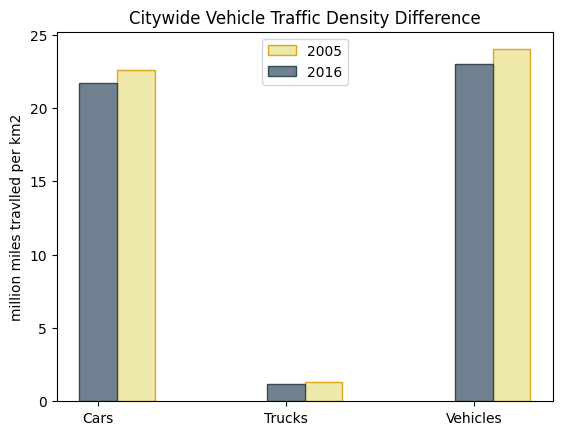

Annual Citywide Averages: Benzene (ug/m3) 2005: 2.9 , NO2 (ppb) 2016: 17.58 , PM2.5 (ppb) 2016: 7.45


In [16]:
trafficdensity_dataset = np.array(trafficdensity_dataset)
benzene = np.array(benzene_dataset)
no2 = np.array(no2)
pm25_free = np.array(pm25_free)
set(benzene[:,5])
set(pm25_free[:,5])
set(no2[:,5])
set(trafficdensity_dataset[:,5])
#yay they're all comparable
#Lets start with citywide, then just do cds since theyre used for city operations and itl show detail and contrast
cw_traffic_05 = []
cw_traffic_16 = []
for i in citywide_ds:
  if "Traffic" in i[2] and i[8] == '2005':
    cw_traffic_05.append(i)
  if "Benzene" in i[2] and i[8] == '2005':
    benzene_05 = i[10]
  if "Traffic" in i[2] and i[8] == '2016':
    cw_traffic_16.append(i)
  if "PM2.5" in i[2] and 'Annual Average 2016' in i[8]:
    pm25_cw_16 = i[10]
  if 'NO2' in i[2] and 'Annual Average 2016' in i[8]:
    no2_cw_16 = i[10]
#visualize
import importlib
importlib.reload(plt)

cw_traffic_05 = np.array(cw_traffic_05)
cw_traffic_16 = np.array(cw_traffic_16)
cwtd05 = [cw_traffic_05[1][10], cw_traffic_05[2][10], cw_traffic_05[0][10]]
cwtd16 = [cw_traffic_16[2][10], cw_traffic_16[0][10], cw_traffic_16[1][10]]


x = np.arange(3)
width = 0.2
plt.bar(x+.1, cwtd05, width, color='palegoldenrod', edgecolor = 'goldenrod')
plt.bar(x-.1, cwtd16, width, color='slategray', edgecolor = 'darkslategray', tick_label = ['Cars', 'Trucks', 'Vehicles'])
plt.xlabel("")
plt.ylabel("million miles travlled per km2")
plt.legend(["2005", "2016"])
plt.title("Citywide Vehicle Traffic Density Difference")
plt.show()

print("Annual Citywide Averages: Benzene (ug/m3) 2005:", benzene_05, ", NO2 (ppb) 2016:", no2_cw_16, ", PM2.5 (ppb) 2016:", pm25_cw_16)

CD1 data splitting and visualization

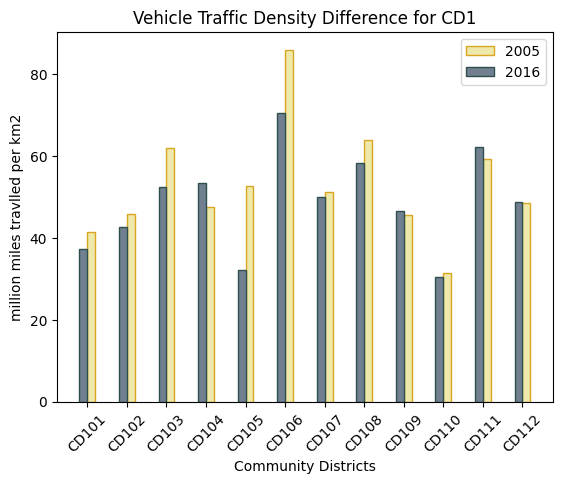

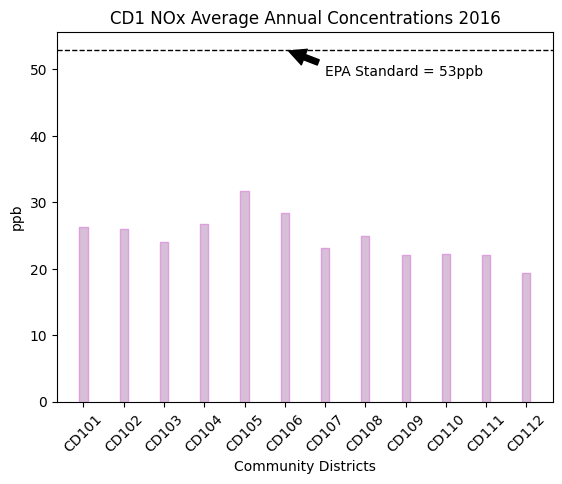

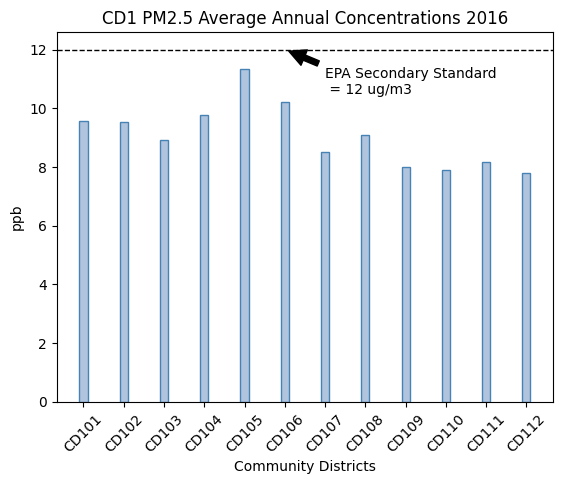

In [26]:
#now do traffic 2005/2016 for each cd. grph them separately with the names of cities for each bar.
#then average each cd and put them together on a graph.
#only work with annual averages rn
#Manhattan 1-12, Bronx 1-12, Brooklyn 1-18, Queens 1-14, Staten Island 1-3

traffic_cd1_16_trucks = []
traffic_cd1_16_cars = []
traffic_cd1_16_vehicles = []
for i in CD1:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled'and i[8] == '2016':
    traffic_cd1_16_vehicles.append(i[10])

#now do 2005, then take the lists and subtract them and make a graph showing the difference gained/lost from 05-16
#or just do only vehicle from 05 and 16 on same graph, 2 per cd

traffic_cd1_05_trucks = []
traffic_cd1_05_cars = []
traffic_cd1_05_vehicles = []
for i in CD1:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2005':
    traffic_cd1_05_vehicles.append(i[10])

x = np.arange(12)
width = 0.2
plt.bar(x+.1, traffic_cd1_05_vehicles, width, color='palegoldenrod', edgecolor = 'goldenrod')
plt.bar(x-.1, traffic_cd1_16_vehicles, width, color='slategray', edgecolor = 'darkslategray')
plt.xticks(x,['CD101', 'CD102', 'CD103', 'CD104', 'CD105', 'CD106', 'CD107',  'CD108', 'CD109', 'CD110', 'CD111', 'CD112'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("million miles travlled per km2")
plt.legend(["2005", "2016"])
plt.title("Vehicle Traffic Density Difference for CD1")
plt.show()

no2_cd1 = []
for i in CD1:
  if "NO2" in i[2] and i[8] == "Annual Average 2016":
    no2_cd1.append(i[10])

x = np.arange(12)
width = 0.2
plt.bar(x, no2_cd1, width, color='thistle', edgecolor = 'plum')
plt.xticks(x, ['CD101', 'CD102', 'CD103', 'CD104', 'CD105', 'CD106', 'CD107',  'CD108', 'CD109', 'CD110', 'CD111', 'CD112'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD1 NOx Average Annual Concentrations 2016")
plt.axhline(y = 53, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Standard = 53ppb", xy=(5, 53), xytext = (6, 49), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()

pm25_cd1 = []
for i in CD1:
  if "PM2.5" in i[2] and i[8] == "Annual Average 2016":
    pm25_cd1.append(i[10])

x = np.arange(12)
width = 0.2
plt.bar(x, pm25_cd1, width, color='lightsteelblue', edgecolor = 'steelblue')
plt.xticks(x, ['CD101', 'CD102', 'CD103', 'CD104', 'CD105', 'CD106', 'CD107',  'CD108', 'CD109', 'CD110', 'CD111', 'CD112'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD1 PM2.5 Average Annual Concentrations 2016")
plt.axhline(y = 12, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Secondary Standard \n = 12 ug/m3", xy=(5, 12), xytext = (6, 10.5), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()

In [27]:
#find maxes for each graph
def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +100
  return f"CD {CD} has the 2016 vehicle max value of {y}"
print(max(traffic_cd1_16_vehicles))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +100
  return f"CD {CD} has the max no2 value of {y}"
print(max(no2_cd1))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +100
  return f"CD {CD} has the max pm25 value of {y}"
print(max(pm25_cd1))

CD 106 has the 2016 vehicle max value of 70.4
CD 105 has the max no2 value of 31.64
CD 105 has the max pm25 value of 11.34


CD2 data splitting and visualization

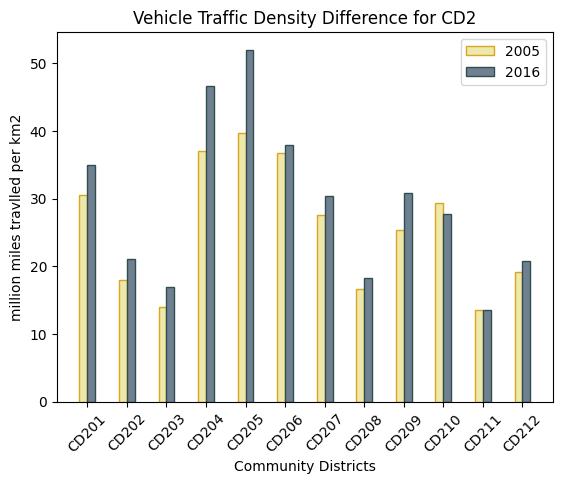

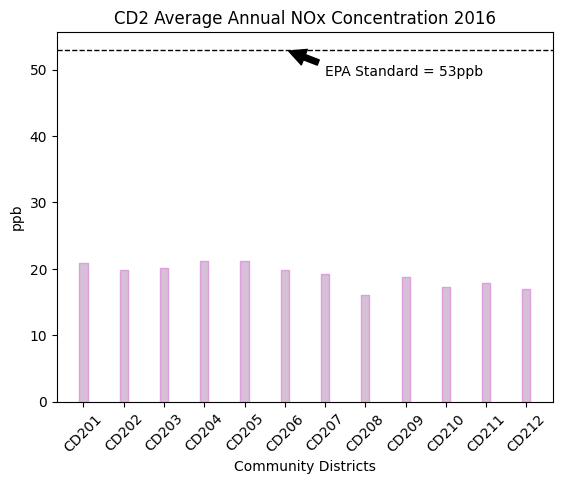

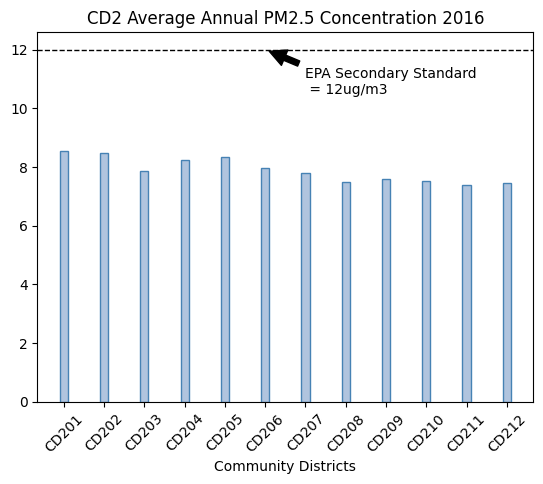

In [28]:

#Bronx 1-12
CD2 = np.array(cd2)

traffic_cd2_16_cars = []
traffic_cd2_16_trucks= []
traffic_cd2_16_vehicle = []
for i in CD2:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2016':
    traffic_cd2_16_vehicle.append(i[10])


traffic_cd2_05_cars = []
traffic_cd2_05_trucks = []
traffic_cd2_05_vehicle = []
for i in CD2:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2005':
    traffic_cd2_05_vehicle.append(i[10])

x = np.arange(12)
width = 0.2
plt.bar(x-0.1, traffic_cd2_16_vehicle, width, color='palegoldenrod', edgecolor = 'goldenrod')
plt.bar(x+0.1, traffic_cd2_05_vehicle, width, color='slategray', edgecolor = 'darkslategray')
plt.xticks(x, ['CD201', 'CD202', 'CD203', 'CD204', 'CD205', 'CD206', 'CD207',  'CD208', 'CD209', 'CD210', 'CD211', 'CD212'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("million miles travlled per km2")
plt.legend(["2005", "2016"])
plt.title("Vehicle Traffic Density Difference for CD2")
plt.show()

no2_cd2 = []
for i in CD2:
  if "NO2" in i[2] and i[8] == "Annual Average 2016":
    no2_cd2.append(i[10])

x = np.arange(12)
width = 0.2
plt.bar(x, no2_cd2, width, color='thistle', edgecolor = 'plum')
plt.xticks(x, ['CD201', 'CD202', 'CD203', 'CD204', 'CD205', 'CD206', 'CD207',  'CD208', 'CD209', 'CD210', 'CD211', 'CD212'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD2 Average Annual NOx Concentration 2016")
plt.axhline(y = 53, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Standard = 53ppb", xy=(5, 53), xytext = (6, 49), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()

pm25_cd2 = []
for i in CD2:
  if "PM2.5" in i[2] and i[8] == "Annual Average 2016":
    pm25_cd2.append(i[10])

x = np.arange(12)
width = 0.2
plt.bar(x, pm25_cd2, width, color='lightsteelblue', edgecolor = 'steelblue')
plt.xticks(x, ['CD201', 'CD202', 'CD203', 'CD204', 'CD205', 'CD206', 'CD207',  'CD208', 'CD209', 'CD210', 'CD211', 'CD212'], rotation = 45)
plt.xlabel("Community Districts")
plt.title("CD2 Average Annual PM2.5 Concentration 2016")
plt.axhline(y = 12, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Secondary Standard \n = 12ug/m3", xy=(5, 12), xytext = (6, 10.5), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()




In [29]:
#find maxes for each graph

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +200
  return f"CD {CD} has the 2016 vehicle max value of {y}"
print(max(traffic_cd2_16_vehicle))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +200
  return f"CD {CD} has the max no2 value of {y}"
print(max(no2_cd2))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +200
  return f"CD {CD} has the max pm25 value of {y}"
print(max(pm25_cd2))

CD 205 has the 2016 vehicle max value of 39.7
CD 204 has the max no2 value of 21.21
CD 201 has the max pm25 value of 8.55


CD3 data splitting and visualization

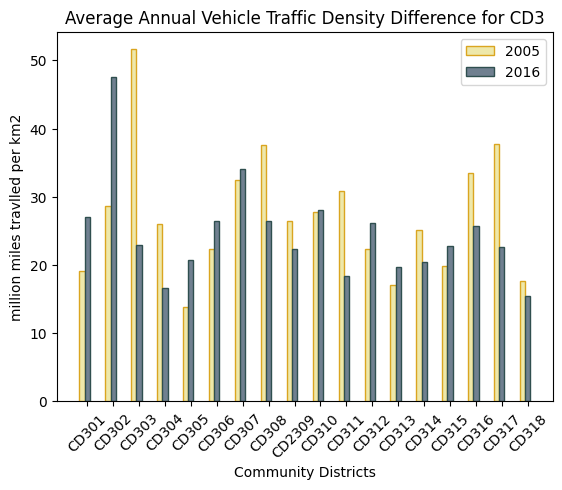

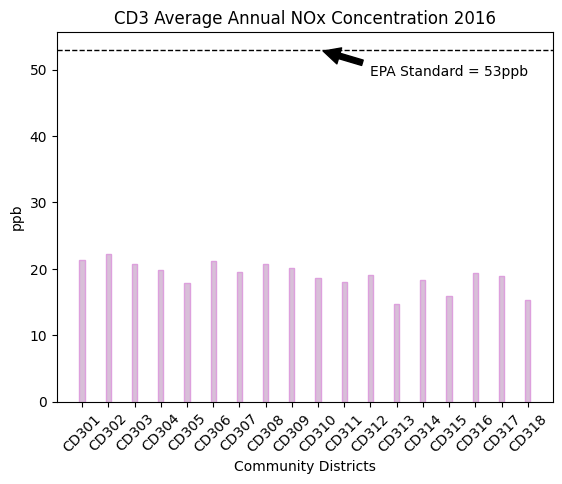

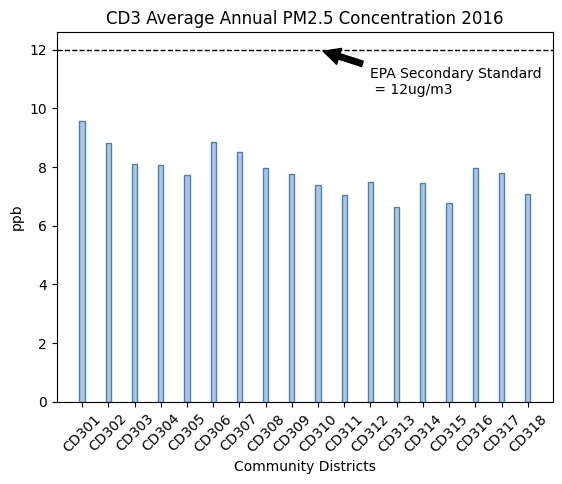

In [30]:
CD3 = np.array(cd3)
#Brooklyn 1-18

traffic_cd3_16_cars = []
traffic_cd3_16_trucks = []
traffic_cd3_16_vehicle = []
for i in CD3:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2016':
    traffic_cd3_16_vehicle.append(i[10])


traffic_cd3_05_cars = []
traffic_cd3_05_trucks = []
traffic_cd3_05_vehicle = []
for i in CD3:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2005':
    traffic_cd3_05_vehicle.append(i[10])

x = np.arange(18)
width = 0.2
plt.bar(x-0.2, traffic_cd3_05_vehicle, width, color='palegoldenrod', edgecolor = 'goldenrod')
plt.bar(x, traffic_cd3_16_vehicle, width, color='slategray', edgecolor = 'darkslategray')
plt.xticks(x, ['CD301', 'CD302', 'CD303', 'CD304', 'CD305', 'CD306', 'CD307',  'CD308', 'CD2309', 'CD310', 'CD311', 'CD312', 'CD313', 'CD314', 'CD315', 'CD316', 'CD317', 'CD318'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("million miles travlled per km2")
plt.legend(["2005", "2016"])
plt.title("Average Annual Vehicle Traffic Density Difference for CD3")
plt.show()

no2_cd3 = []
for i in CD3:
  if "NO2" in i[2] and i[8] == "Annual Average 2016":
    no2_cd3.append(i[10])

x = np.arange(18)
width = 0.2
plt.bar(x, no2_cd3, width, color='thistle', edgecolor = 'plum')
plt.xticks(x, ['CD301', 'CD302', 'CD303', 'CD304', 'CD305', 'CD306', 'CD307',  'CD308', 'CD309', 'CD310', 'CD311', 'CD312', 'CD313', 'CD314', 'CD315', 'CD316', 'CD317', 'CD318'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD3 Average Annual NOx Concentration 2016")
plt.axhline(y = 53, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Standard = 53ppb", xy=(9, 53), xytext = (11, 49), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()

pm25_cd3 = []
for i in CD3:
  if "PM2.5" in i[2] and i[8] == "Annual Average 2016":
    pm25_cd3.append(i[10])

x = np.arange(18)
width = 0.2
plt.bar(x, pm25_cd3, width, color='lightsteelblue', edgecolor = 'steelblue')
plt.xticks(x, ['CD301', 'CD302', 'CD303', 'CD304', 'CD305', 'CD306', 'CD307',  'CD308', 'CD309', 'CD310', 'CD311', 'CD312', 'CD313', 'CD314', 'CD315', 'CD316', 'CD317', 'CD318'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD3 Average Annual PM2.5 Concentration 2016")
plt.axhline(y = 12, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Secondary Standard \n = 12ug/m3", xy=(9, 12), xytext = (11, 10.5), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()


In [31]:
#find maxes for each graph

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +300
  return f"CD {CD} has the 2016 vehicle max value of {y}"
print(max(traffic_cd3_16_vehicle))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +300
  return f"CD {CD} has the max no2 value of {y}"
print(max(no2_cd3))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +300
  return f"CD {CD} has the max pm25 value of {y}"
print(max(pm25_cd3))

CD 302 has the 2016 vehicle max value of 47.6
CD 302 has the max no2 value of 22.16
CD 301 has the max pm25 value of 9.55


CD4 data splitting and visualization

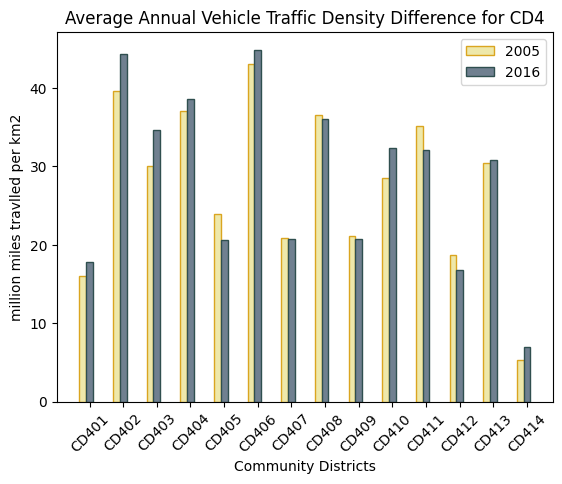

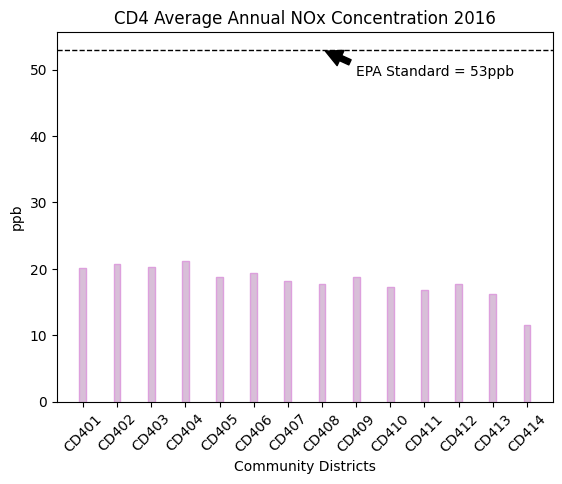

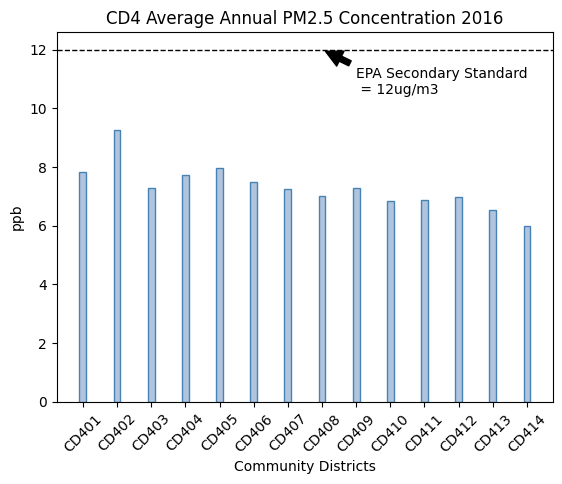

In [32]:

CD4 = np.array(cd4)
#Queens 1-14

traffic_cd4_16_cars = []
traffic_cd4_16_trucks = []
traffic_cd4_16_vehicle = []
for i in CD4:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2016':
    traffic_cd4_16_vehicle.append(i[10])

traffic_cd4_05_cars = []
traffic_cd4_05_trucks = []
traffic_cd4_05_vehicle = []
for i in CD4:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2005':
    traffic_cd4_05_vehicle.append(i[10])

x = np.arange(14)
width = 0.2
plt.bar(x-0.2, traffic_cd4_05_vehicle, width, color='palegoldenrod', edgecolor = 'goldenrod')
plt.bar(x, traffic_cd4_16_vehicle, width, color='slategray', edgecolor = 'darkslategray')
plt.xticks(x, ['CD401', 'CD402', 'CD403', 'CD404', 'CD405', 'CD406', 'CD407',  'CD408', 'CD409', 'CD410', 'CD411', 'CD412', 'CD413', 'CD414'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("million miles travlled per km2")
plt.legend(["2005", "2016"])
plt.title("Average Annual Vehicle Traffic Density Difference for CD4")
plt.show()


no2_cd4 = []
for i in CD4:
  if "NO2" in i[2] and i[8] == "Annual Average 2016":
    no2_cd4.append(i[10])

x = np.arange(14)
width = 0.2
plt.bar(x, no2_cd4, width, color='thistle', edgecolor = 'plum')
plt.xticks(x, ['CD401', 'CD402', 'CD403', 'CD404', 'CD405', 'CD406', 'CD407',  'CD408', 'CD409', 'CD410', 'CD411', 'CD412', 'CD413', 'CD414'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD4 Average Annual NOx Concentration 2016")
plt.axhline(y = 53, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Standard = 53ppb", xy=(7, 53), xytext = (8, 49), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()

pm25_cd4 = []
for i in CD4:
  if "PM2.5" in i[2] and i[8] == "Annual Average 2016":
    pm25_cd4.append(i[10])

x = np.arange(14)
width = 0.2
plt.bar(x, pm25_cd4, width, color='lightsteelblue', edgecolor = 'steelblue')
plt.xticks(x, ['CD401', 'CD402', 'CD403', 'CD404', 'CD405', 'CD406', 'CD407',  'CD408', 'CD409', 'CD410', 'CD411', 'CD412', 'CD413', 'CD414'], rotation = 45)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD4 Average Annual PM2.5 Concentration 2016")
plt.axhline(y = 12, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Secondary Standard \n = 12ug/m3", xy=(7, 12), xytext = (8, 10.5), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()



#increase size of bar

In [33]:
#find maxes for each graph

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +400
  return f"CD {CD} has the 2016 vehicle max value of {y}"
print(max(traffic_cd4_16_vehicle))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +400
  return f"CD {CD} has the max no2 value of {y}"
print(max(no2_cd4))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +400
  return f"CD {CD} has the max pm25 value of {y}"
print(max(pm25_cd4))

CD 406 has the 2016 vehicle max value of 44.9
CD 404 has the max no2 value of 21.21
CD 402 has the max pm25 value of 9.27


CD5 data splitting and visualization

[325297 643 'Traffic Density- Annual Vehicle Miles Traveled'
 'million miles' 'per km2' 'CD' 501 'St. George and Stapleton (CD1)'
 '2016' '01/01/2016' 11.3 nan]
[325298 643 'Traffic Density- Annual Vehicle Miles Traveled'
 'million miles' 'per km2' 'CD' 502 'South Beach and Willowbrook (CD2)'
 '2016' '01/01/2016' 11.8 nan]
[325299 643 'Traffic Density- Annual Vehicle Miles Traveled'
 'million miles' 'per km2' 'CD' 503 'Tottenville and Great Kills (CD3)'
 '2016' '01/01/2016' 6.5 nan]


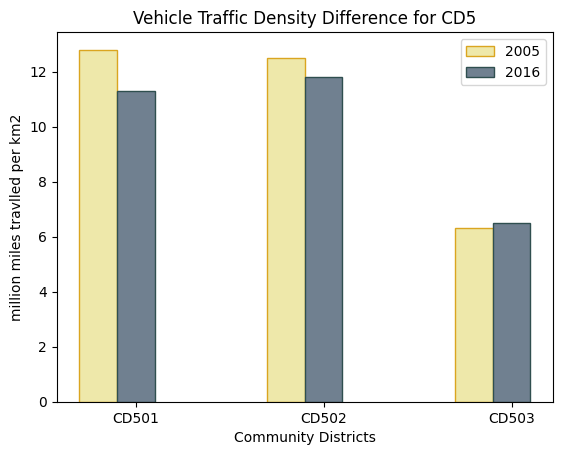

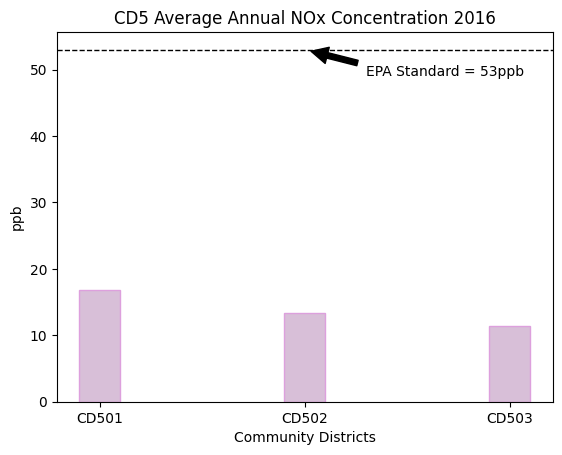

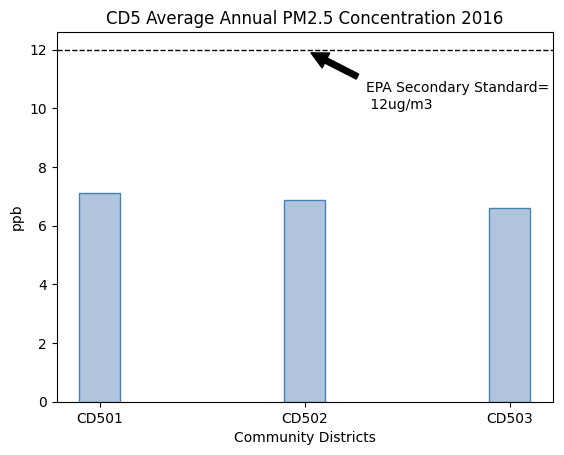

In [34]:
CD5 = np.array(cd5)
#Staten Island 1-3

traffic_cd5_16_cars = []
traffic_cd5_16_trucks = []
traffic_cd5_16_vehicle = []
for i in CD5:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2016':
    traffic_cd5_16_vehicle.append(i[10])
    print(i)


traffic_cd5_05_cars = []
traffic_cd5_05_trucks = []
traffic_cd5_05_vehicle = []
for i in CD5:
  if i[2] == 'Traffic Density- Annual Vehicle Miles Traveled' and i[8] == '2005':
    traffic_cd5_05_vehicle.append(i[10])


x = np.arange(3)
width = 0.2
plt.bar(x-0.2, traffic_cd5_05_vehicle, width, color='palegoldenrod', edgecolor = 'goldenrod')
plt.bar(x, traffic_cd5_16_vehicle, width, color='slategray', edgecolor = 'darkslategray')
plt.xticks(x, ['CD501', 'CD502', 'CD503'], rotation = 0)
plt.xlabel("Community Districts")
plt.ylabel("million miles travlled per km2")
plt.legend(["2005", "2016"])
plt.title("Vehicle Traffic Density Difference for CD5")
plt.show()


no2_cd5 = []
for i in CD5:
  if "NO2" in i[2] and i[8] == "Annual Average 2016":
    no2_cd5.append(i[10])

x = np.arange(3)
width = 0.2
plt.bar(x, no2_cd5, width, color='thistle', edgecolor = 'plum')
plt.xticks(x, ['CD501', 'CD502', 'CD503'], rotation = 0)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD5 Average Annual NOx Concentration 2016")
plt.axhline(y = 53, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Standard = 53ppb", xy=(1, 53), xytext = (1.3, 49), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()

pm25_cd5 = []
for i in CD5:
  if "PM2.5" in i[2] and i[8] == "Annual Average 2016":
    pm25_cd5.append(i[10])

x = np.arange(3)
width = 0.2
plt.bar(x, pm25_cd5, width, color='lightsteelblue', edgecolor = 'steelblue')
plt.xticks(x, ['CD501', 'CD502', 'CD503'], rotation = 0)
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD5 Average Annual PM2.5 Concentration 2016")
plt.axhline(y = 12, linewidth= 1, color = 'black', linestyle = 'dashed')
plt.annotate("EPA Secondary Standard= \n 12ug/m3", xy=(1, 12), xytext = (1.3, 10), arrowprops = dict(facecolor = "black", shrink = 0.1))
plt.show()



In [35]:
#find maxes for each graph

print(traffic_cd5_16_vehicle)
print(no2_cd5)

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +500
  return f"CD {CD} has the 2016 vehicle max value of {y}"
print(max(traffic_cd5_16_vehicle))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +500
  return f"CD {CD} has the max no2 value of {y}"
print(max(no2_cd5))

def max(lst):
  x = np.argmax(lst)
  y = np.max(lst)
  CD = (x+1) +500
  return f"CD {CD} has the max pm25 value of {y}"
print(max(pm25_cd5))

[11.3, 11.8, 6.5]
[16.86, 13.36, 11.44]
CD 502 has the 2016 vehicle max value of 11.8
CD 501 has the max no2 value of 16.86
CD 501 has the max pm25 value of 7.11


Average CD values to get bigger picture for CD1-5 rather than little bits

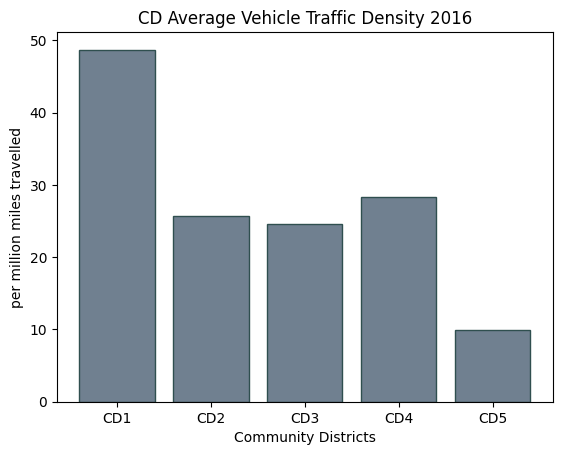

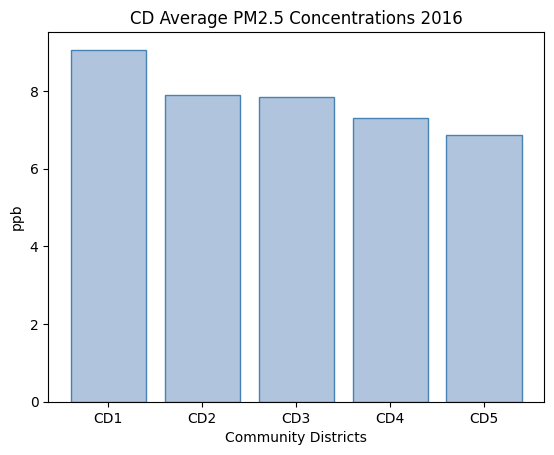

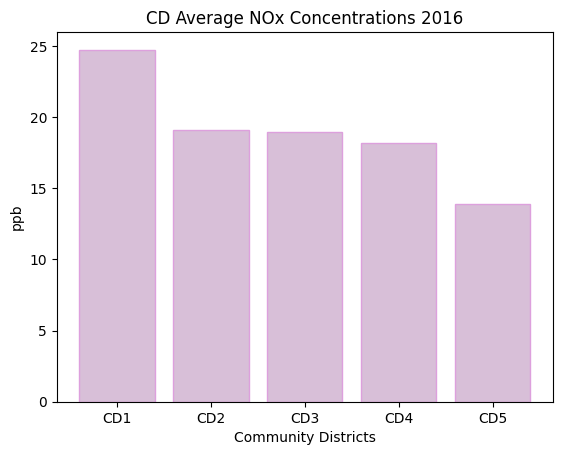

In [36]:
avg_cd_traffic = []
avg_cd_pm25 = []
avg_cd_no2 = []

def avg_cds_traffic(*cdlists):
  avg_cd_traffic = []
  for cdlist in cdlists:
    cdlist = np.array(cdlist)
    x = np.mean(cdlist)
    avg_cd_traffic.append(x)
  return avg_cd_traffic
avg_cd_traffic = avg_cds_traffic(traffic_cd1_16_vehicles, traffic_cd2_16_vehicle, traffic_cd3_16_vehicle, traffic_cd4_16_vehicle, traffic_cd5_16_vehicle)

def avg_cds_pm25(*cdlists):
  avg_cd_pm25 = []
  for cdlist in cdlists:
    cdlist = np.array(cdlist)
    x = np.mean(cdlist)
    avg_cd_pm25.append(x)
  return avg_cd_pm25
avg_cd_pm25 = avg_cds_pm25(pm25_cd1, pm25_cd2, pm25_cd3, pm25_cd4, pm25_cd5)

def avg_cds_no2(*cdlists):
  avg_cd_no2 = []
  for cdlist in cdlists:
    cdlist = np.array(cdlist)
    x = np.mean(cdlist)
    avg_cd_no2.append(x)
  return avg_cd_no2
avg_cd_no2 = avg_cds_no2(no2_cd1, no2_cd2, no2_cd3, no2_cd4, no2_cd5)

traffic_names = ["CD1Traffic16", "CD2Traffic16", "CD3Traffic16", "CD4Traffic16", "CD5Traffic16"]
pm25_names = ["CD1PM2.5", "CD2PM2.5", "CD3PM2.5", "CD4PM2.5", "CD5PM2.5"]
no2_names = ["CD1NOx", "CD2NOx", "CD3NOx", "CD4NOx", "CD5NOx"]
AvgCDTraffic = dict(zip(traffic_names, avg_cd_traffic))
AvgCDNOx = dict(zip(no2_names, avg_cd_no2))

AvgCDpm25 = dict(zip(pm25_names, avg_cd_pm25))

gh = ["CD1", "CD2", "CD3", "CD4", "CD5"]
names = list(AvgCDTraffic.keys())
values = list(AvgCDTraffic.values())
plt.bar(range(len(AvgCDTraffic)), values, tick_label = gh, color = "slategray", edgecolor = "darkslategray")
plt.xlabel("Community Districts")
plt.ylabel("per million miles travelled")
plt.title("CD Average Vehicle Traffic Density 2016")
plt.show()

names = list(AvgCDpm25.keys())
values = list(AvgCDpm25.values())
plt.bar(range(len(AvgCDpm25)), values, tick_label = gh, color = "lightsteelblue", edgecolor = "steelblue")
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD Average PM2.5 Concentrations 2016")
plt.show()

names = list(AvgCDNOx.keys())
values = list(AvgCDNOx.values())
plt.bar(range(len(AvgCDNOx)), values, tick_label = gh, color = "thistle", edgecolor = "plum")
plt.xlabel("Community Districts")
plt.ylabel("ppb")
plt.title("CD Average NOx Concentrations 2016")
plt.show()





In [37]:
cd1_np = np.array(cd1)
district1_names = dict(cd1_np[:,[6,7]])
cd2_np = np.array(cd2)
district2_names = dict(cd2_np[:,[6,7]])
cd3_np = np.array(cd3)
district3_names = dict(cd3_np[:,[6,7]])
cd4_np = np.array(cd4)
district4_names = dict(cd4_np[:,[6,7]])
cd5_np = np.array(cd5)
district5_names = dict(cd5_np[:,[6,7]])
print("CD1", district1_names, "CD2", district2_names, "CD3", district3_names, "CD4", district4_names, "CD5", district5_names)

CD1 {101: 'Financial District (CD1)', 102: 'Greenwich Village and Soho (CD2)', 103: 'Lower East Side and Chinatown (CD3)', 104: 'Clinton and Chelsea (CD4)', 105: 'Midtown (CD5)', 106: 'Stuyvesant Town and Turtle Bay (CD6)', 107: 'Upper West Side (CD7)', 108: 'Upper East Side (CD8)', 109: 'Morningside Heights and Hamilton Heights (CD9)', 110: 'Central Harlem (CD10)', 111: 'East Harlem (CD11)', 112: 'Washington Heights and Inwood (CD12)'} CD2 {211: 'Morris Park and Bronxdale (CD11)', 212: 'Williamsbridge and Baychester (CD12)', 206: 'Belmont and East Tremont (CD6)', 207: 'Kingsbridge Heights and Bedford (CD7)', 208: 'Riverdale and Fieldston (CD8)', 209: 'Parkchester and Soundview (CD9)', 210: 'Throgs Neck and Co-op City (CD10)', 201: 'Mott Haven and Melrose (CD1)', 202: 'Hunts Point and Longwood (CD2)', 203: 'Morrisania and Crotona (CD3)', 204: 'Highbridge and Concourse (CD4)', 205: 'Fordham and University Heights (CD5)'} CD3 {313: 'Coney Island (CD13)', 301: 'Greenpoint and Williamsburg

In [38]:
import seaborn as sns

     AvgTraffic     AvgNOx   Avgpm25
CD1   48.691667  24.725833  9.062500
CD2   25.625000  19.085000  7.890000
CD3   24.644444  18.976667  7.835000
CD4   28.378571  18.177143  7.307857
CD5    9.866667  13.886667  6.873333


<Axes: title={'center': 'Average Traffic Density Compared to PM2.5 Concentrations per CD'}, xlabel='Avg Traffic Density (million miles travelled)', ylabel='Avg NOx (ppb)'>

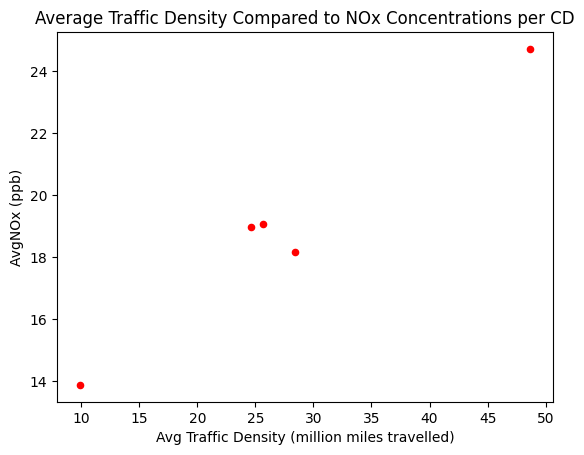

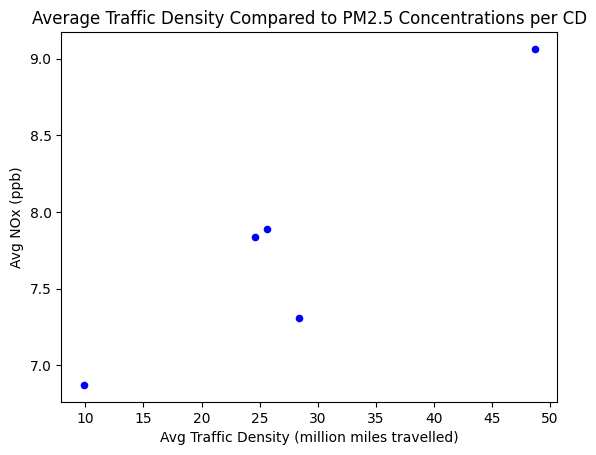

In [151]:
corrdf = pd.DataFrame({"AvgTraffic": avg_cd_traffic  , "AvgNOx": avg_cd_no2, "Avgpm25": avg_cd_pm25}, index =(["CD1", "CD2", "CD3", "CD4", "CD5"]))
print(corrdf)
corrdf.plot.scatter(x = 'AvgTraffic', y = 'AvgNOx', c = 'red', title = "Average Traffic Density Compared to NOx Concentrations per CD", xlabel = "Avg Traffic Density (million miles travelled)", ylabel = "AvgNOx (ppb)")
corrdf.plot.scatter(x = 'AvgTraffic', y = 'Avgpm25', c = 'blue', title = "Average Traffic Density Compared to PM2.5 Concentrations per CD", xlabel ="Avg Traffic Density (million miles travelled)", ylabel = "Avg NOx (ppb)" )

#weak positive correlation between traffic density and contaminant concentration

In [133]:
pm25_ae_adults = np.array(pm25_ae_adults)
pm25_ae_children = np.array(pm25_ae_children)
pm25_resphosp = np.array(pm25_resphosp)
pm25_cardhosp = np.array(pm25_cardhosp)
pm25_death = np.array(pm25_death)
#pm25 health data has 2015=2017  data for borough, uhf42, and citywide. we can go by borough to compare to cd.

pm25_death_boroughs = []
for i in pm25_death:
  if i[5] == 'Borough' and i[8] == '2015-2017':
    pm25_death_boroughs.append(i)

pm25_cardhosp_boroughs = []
for i in pm25_cardhosp:
  if i[5] == 'Borough' and i[8] == '2015-2017':
    pm25_cardhosp_boroughs.append(i)

pm25_resphosp_boroughs = []
for i in pm25_resphosp:
  if i[5] == 'Borough' and i[8] == '2015-2017':
    pm25_resphosp_boroughs.append(i)

pm25_asthemerg_boroughs = []
for i in pm25_asthemerg:
  if i[5] == 'Borough' and i[8] == '2015-2017':
    pm25_asthemerg_boroughs.append(i)


totals_card = {}
totals_resp = {}
totals_death = {}
for i in pm25_death_boroughs:
  if i[7] == 'Manhattan':
    totals_death["Manhattan"] = i[10]
  if i[7] == 'Bronx':
    totals_death["Bronx"] = i[10]
  if i[7] == 'Brooklyn':
    totals_death["Brooklyn"] = i[10]
  if i[7] == 'Queens':
    totals_death["Queens"] = i[10]
  if i[7] == 'Staten Island':
    totals_death["Staten Island"] = i[10]
print("Attributable deaths due to pm25:", totals_death)

for i in pm25_cardhosp_boroughs:
  if i[7] == 'Manhattan':
    totals_card["Manhattan"] = i[10]
  if i[7] == 'Bronx':
    totals_card["Bronx"] = i[10]
  if i[7] == 'Brooklyn':
    totals_card["Brooklyn"] = i[10]
  if i[7] == 'Queens':
    totals_card["Queens"] = i[10]
  if i[7] == 'Staten Island':
    totals_card["Staten Island"] = i[10]
print("Attributable cardiovalscular hospitalizations due to pm25:", totals_card)

for i in pm25_resphosp_boroughs:
  if i[7] == 'Manhattan':
    totals_resp["Manhattan"] = i[10]
  if i[7] == 'Bronx':
    totals_resp["Bronx"] = i[10]
  if i[7] == 'Brooklyn':
    totals_resp["Brooklyn"] = i[10]
  if i[7] == 'Queens':
    totals_resp["Queens"] = i[10]
  if i[7] == 'Staten Island':
    totals_resp["Staten Island"] = i[10]
print("Attributable respiratory hospitalizations due to pm25:", totals_resp)





totalb = 0
totals = {}
bronx = []
brooklyn = []
totalbrook = 0
manhattan = []
totalm = 0
queens = []
totalq = 0
stati = []
totalstati = 0
def asth_totals(asthemerg):
  for i in asthemerg:
    if i[7] =='Manhattan':
      manhattan.append(i[10])
      totalm = sum(manhattan)
      totals["Manhattan"] = totalm
    elif i[7] == 'Bronx':
      bronx.append(i[10])
      totalb = sum(bronx)
      totals["Bronx"] = totalb
    elif i[7] =='Brooklyn':
      brooklyn.append(i[10])
      totalbrook = sum(brooklyn)
      totals["Brooklyn"] = totalbrook
    elif i[7] =='Queens':
      queens.append(i[10])
      totalq = sum(queens)
      totals["Queens"] = totalq
    elif i[7] =='Staten Island':
      stati.append(i[10])
      totalstati = sum(stati)
      totals["Staten Island"] = totalstati
  return totals
totals = asth_totals(pm25_asthemerg_boroughs)
print("Total ER asthma visits due to pm25", totals)

#traffic density is out of order with the boroughs and will need to be adjusted
avg_cd_traffic_new = []
def avg_cds_traffic_new(*old):
  avg_cd_traffic_new = []
  for i in old:
    i = np.array(i)
    x = np.mean(i)
    avg_cd_traffic_new.append(x)
  return avg_cd_traffic_new
avg_cd_traffic_new = avg_cds_traffic(traffic_cd2_16_vehicle, traffic_cd3_16_vehicle, traffic_cd1_16_vehicles, traffic_cd4_16_vehicle, traffic_cd5_16_vehicle)
print(avg_cd_traffic_new)
print(avg_cd_traffic)

morbidities = pd.DataFrame({"Avg Annual Traffic Density 2016": avg_cd_traffic_new, "Attributable Deaths": totals_death.values(), "Attributable cardiovalscular hospitalizations": totals_card.values(), "Attributable respiratory hospitalizations": totals_resp.values(), "Total ER asthma visits due to pm25": totals.values()}, index = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"])
morbidities
#now make some scatter plots

Attributable deaths due to pm25: {'Bronx': 44.4, 'Brooklyn': 38.3, 'Manhattan': 38.0, 'Queens': 31.4, 'Staten Island': 46.9}
Attributable cardiovalscular hospitalizations due to pm25: {'Bronx': 21.0, 'Brooklyn': 18.2, 'Manhattan': 14.6, 'Queens': 15.5, 'Staten Island': 17.0}
Attributable respiratory hospitalizations due to pm25: {'Bronx': 19.6, 'Brooklyn': 10.5, 'Manhattan': 9.6, 'Queens': 9.6, 'Staten Island': 15.0}
Total ER asthma visits due to pm25 {'Bronx': 213.9, 'Brooklyn': 97.4, 'Manhattan': 128.3, 'Queens': 65.19999999999999, 'Staten Island': 53.900000000000006}
[25.625, 24.644444444444446, 48.69166666666666, 28.37857142857143, 9.866666666666667]
[48.69166666666666, 25.625, 24.644444444444446, 28.37857142857143, 9.866666666666667]


,Avg Annual Traffic Density 2016,Attributable Deaths,Attributable cardiovalscular hospitalizations,Attributable respiratory hospitalizations,Total ER asthma visits due to pm25
Bronx,25.625000,44.4,21.0,19.6,213.9
Brooklyn,24.644444,38.3,18.2,10.5,97.4
Manhattan,48.691667,38.0,14.6,9.6,128.3
Queens,28.378571,31.4,15.5,9.6,65.2
Staten Island,9.866667,46.9,17.0,15.0,53.9


<Axes: xlabel='Avg Annual Traffic Density 2016', ylabel='Attributable Deaths'>

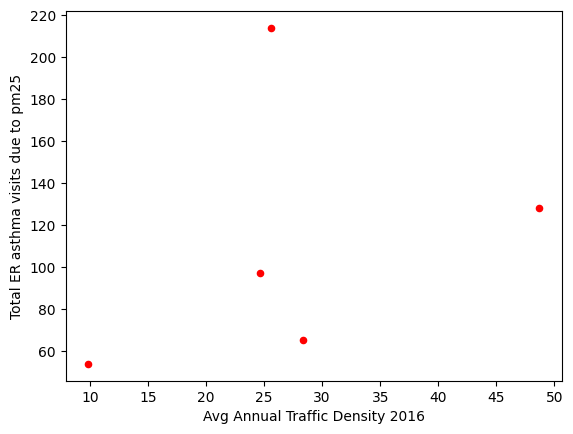

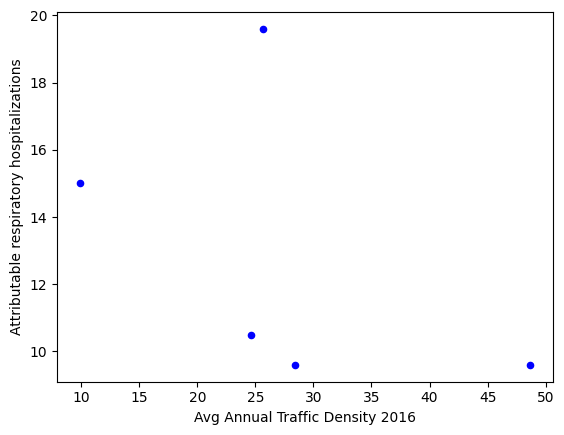

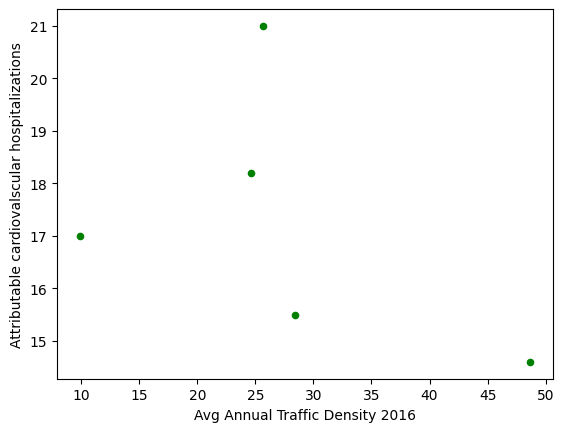

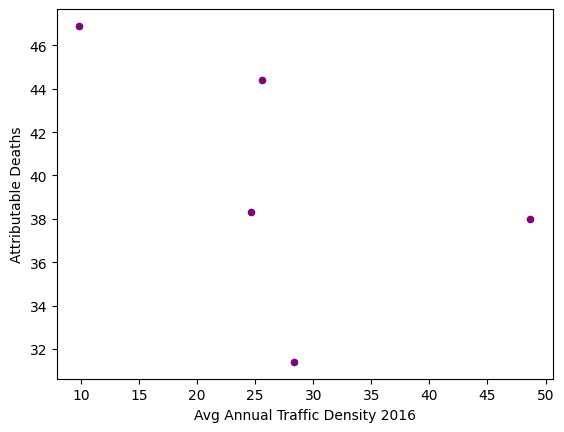

In [144]:
morbidities.plot.scatter(x = 'Avg Annual Traffic Density 2016', y = 'Total ER asthma visits due to pm25', c = 'red')
morbidities.plot.scatter(x = 'Avg Annual Traffic Density 2016', y = 'Attributable respiratory hospitalizations', c = 'blue')
morbidities.plot.scatter(x = 'Avg Annual Traffic Density 2016', y = 'Attributable cardiovalscular hospitalizations', c = 'green')
morbidities.plot.scatter(x = 'Avg Annual Traffic Density 2016', y = 'Attributable Deaths', c = 'purple')


#this makes sense because none of the contaminant concentrations were over the epa standard